In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print heading - for display purposes only
def heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

In [3]:
# load data set from kaggle
df = pd.read_csv('/kaggle/input/drug-overdose/drug-overdose-death-rates new.csv')
df.head()

,Entity,Code,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
0,United States,USA,1999,2.9,1.4,0.7,0.3,1.2
1,United States,USA,2000,3.0,1.3,0.7,0.3,1.3
2,United States,USA,2001,3.3,1.3,0.6,0.3,1.7
3,United States,USA,2002,4.1,1.6,0.7,0.4,2.3
4,United States,USA,2003,4.5,1.8,0.7,0.5,2.6


In [4]:
import pandas as pd

# Assuming df is your DataFrame and it's already defined
# df = pd.read_csv('your_data.csv')

df_1 = df.rename(columns={
    'Any opioid death rates (CDC WONDER)': 'Opioid',
    'Cocaine overdose death rates (CDC WONDER)': 'Cocaine',
    'Heroin overdose death rates (CDC WONDER)': 'Heroin',
    'Synthetic opioids death rates (CDC WONDER)': 'Synthetic opioids',
    'Prescription Opioids death rates (US CDC WONDER)': 'Prescription Opioids',})

In [5]:
df_1.head()

,Entity,Code,Year,Opioid,Cocaine,Heroin,Synthetic opioids,Prescription Opioids
0,United States,USA,1999,2.9,1.4,0.7,0.3,1.2
1,United States,USA,2000,3.0,1.3,0.7,0.3,1.3
2,United States,USA,2001,3.3,1.3,0.6,0.3,1.7
3,United States,USA,2002,4.1,1.6,0.7,0.4,2.3
4,United States,USA,2003,4.5,1.8,0.7,0.5,2.6


In [6]:
# Check unique values
df['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# Dataset Overview

In [7]:
heading('Information of dataset')
df.info()

--------------------------------------------------
INFORMATION OF DATASET
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            22 non-null     object 
 1   Code                                              22 non-null     object 
 2   Year                                              22 non-null     int64  
 3   Any opioid death rates (CDC WONDER)               22 non-null     float64
 4   Cocaine overdose death rates (CDC WONDER)         22 non-null     float64
 5   Heroin overdose death rates (CDC WONDER)          22 non-null     float64
 6   Synthetic opioids death rates (CDC WONDER)        22 non-null     float64
 7   Prescription Opioids death rates (US CDC WONDER)  22 non-

In [8]:
heading('Description of dataset')
df_1.describe()

--------------------------------------------------
DESCRIPTION OF DATASET
--------------------------------------------------


,Year,Opioid,Cocaine,Heroin,Synthetic opioids,Prescription Opioids
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2009.500000,8.231818,2.350000,2.081818,3.145455,3.809091
std,6.493587,4.856747,1.351454,1.685692,4.716004,1.256567
min,1999.000000,2.900000,1.300000,0.600000,0.300000,1.200000
25%,2004.250000,4.800000,1.425000,0.700000,0.600000,2.975000
50%,2009.500000,6.700000,1.750000,1.050000,0.850000,4.350000
75%,2014.750000,10.050000,2.425000,3.925000,2.775000,4.675000
max,2020.000000,21.400000,6.000000,4.900000,17.800000,5.200000


# Deal Missing values

In [9]:
# check for missing values
heading('Missing Values')
df.isnull().sum().sort_values(ascending=False)

--------------------------------------------------
MISSING VALUES
--------------------------------------------------


Entity                                              0
Code                                                0
Year                                                0
Any opioid death rates (CDC WONDER)                 0
Cocaine overdose death rates (CDC WONDER)           0
Heroin overdose death rates (CDC WONDER)            0
Synthetic opioids death rates (CDC WONDER)          0
Prescription Opioids death rates (US CDC WONDER)    0
dtype: int64

We have no Missing values lets Dive into other operation

In [10]:
# check numericall columns
df_1.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Opioid', 'Cocaine', 'Heroin', 'Synthetic opioids',
       'Prescription Opioids'],
      dtype='object')

In [11]:
numerical = ['Year', 'Opioid', 'Cocaine', 'Heroin', 'Synthetic opioids',
       'Prescription Opioids']

In [12]:
correlation =df_1[numerical].corr().sum()
print(correlation)

Year                    5.168116
Opioid                  5.355223
Cocaine                 4.779123
Heroin                  4.951057
Synthetic opioids       4.916225
Prescription Opioids    4.076195
dtype: float64


Opioid Death Rate (5.36): This represents the overall death rate due to opioids, including various types like cocaine, heroin, synthetic opioids, and prescription opioids.

Cocaine Death Rate (4.78): This is the death rate specifically caused by cocaine overdose.

Heroin Death Rate (4.95): This is the death rate attributed to heroin overdose.

Synthetic Opioids Death Rate (4.92): This accounts for deaths caused by synthetic opioids, which are manufactured to mimic natural opioids.

Prescription Opioids Death Rate (4.08): This indicates deaths resulting from the use or misuse of prescription opioids.

# Check Outliers

--------------------------------------------------
OUTLIERS
--------------------------------------------------


<Axes: >

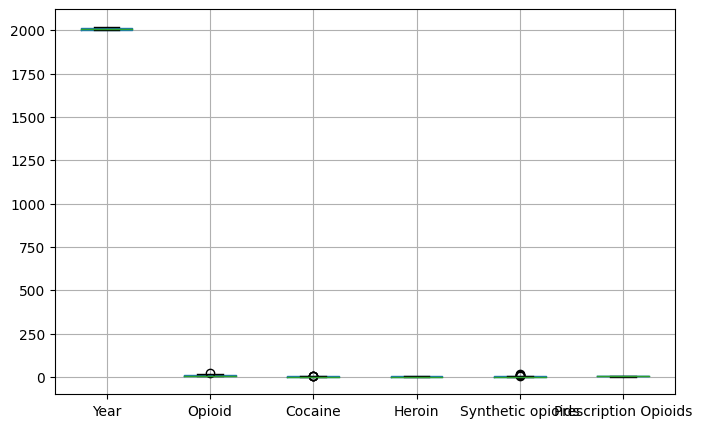

In [13]:
# check outliers 
heading('Outliers')
df_1.boxplot(figsize=(8, 5))

# Exploratary Data analysis

My purpose is to recognizing and understanding all the features or aspects related to drug overdose

<Axes: title={'center': 'Year vs opioid'}, xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

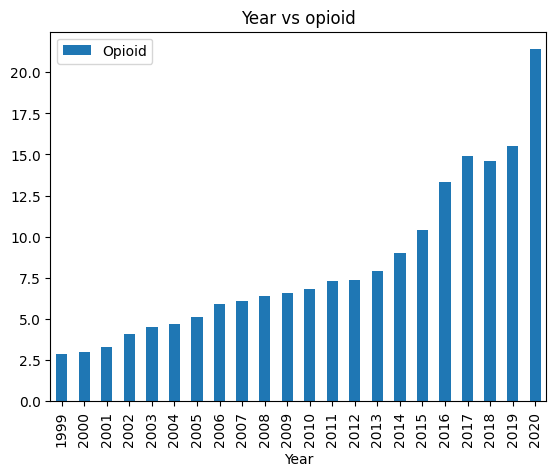

In [14]:
# create barplot on year and opioid
plt.figure(figsize=(10, 5))
df_1.plot(x='Year', y='Opioid' ,kind='bar', title="Year vs opioid")

In [15]:
# Assuming 'df' is your DataFrame
max_cocaine_year = df.loc[df_1['Opioid'].idxmax()]['Year']
print("The year with the highest amount of Opioid recorded:", max_cocaine_year)

The year with the highest amount of Opioid recorded: 2020


<Axes: title={'center': 'Year vs Cocaine'}, xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

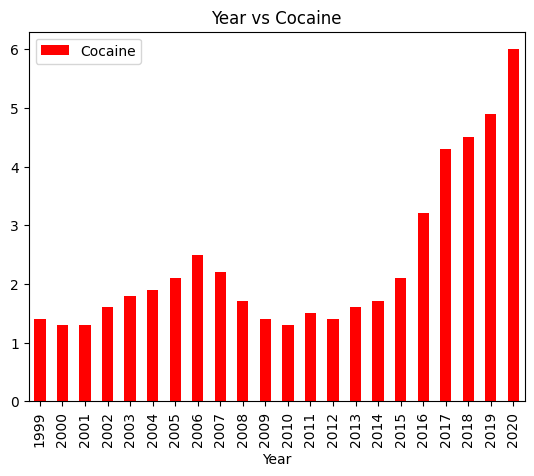

In [16]:
# Create a bar plot
plt.figure(figsize=(10,5))
df_1.plot(x='Year',y='Cocaine',kind='bar',title='Year vs Cocaine',color='red')

In [17]:
# Assuming 'df' is your Dataframe
max_cocaine_year=df.loc[df_1['Cocaine'].idxmax()]['Year']
print("The year with the highest amount of Cocaine recorded:",max_cocaine_year)

The year with the highest amount of Cocaine recorded: 2020


<Axes: title={'center': 'Year vs Heroin'}, xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

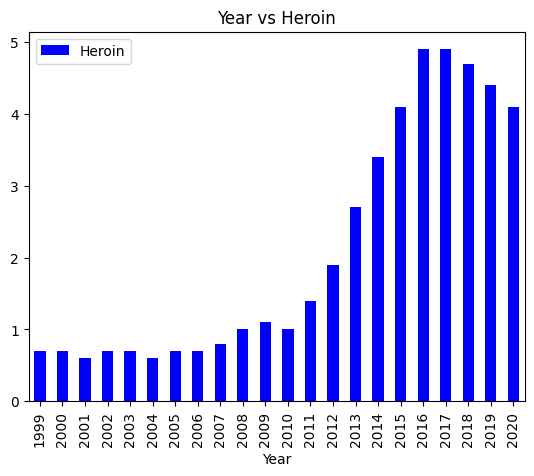

In [18]:
# Create a bar plot
plt.figure(figsize=(10,5))
df_1.plot(x='Year',y='Heroin',kind='bar',title='Year vs Heroin',color='blue')

In [19]:
# Assuming 'df' is your DataFrame
max_cocaine_year = df.loc[df_1['Heroin'].idxmax()]['Year']
print("The year with the highest amount of heroin recorded:", max_cocaine_year)

The year with the highest amount of heroin recorded: 2016


<Axes: title={'center': 'Year vs prescription Opioids'}, xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

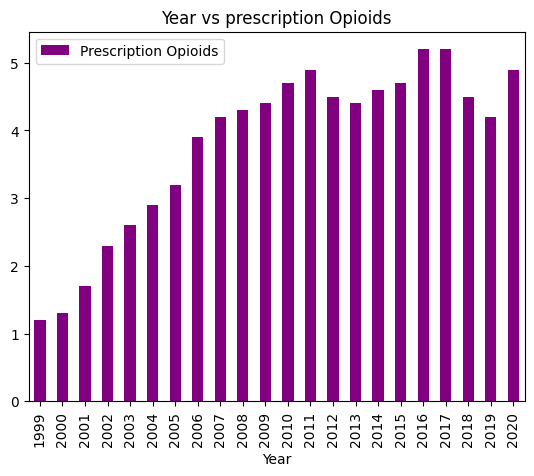

In [20]:
# Create a bar plot
plt.figure(figsize=(10, 5))
df_1.plot(x='Year', y='Prescription Opioids', kind='bar', title='Year vs prescription Opioids', color='purple')

In [21]:
# Assuming 'df' is your DataFrame
max_cocaine_year = df.loc[df_1['Prescription Opioids'].idxmax()]['Year']
print("The year with the highest amount of prescription opioids recorded:", max_cocaine_year)

The year with the highest amount of prescription opioids recorded: 2016


<Axes: title={'center': 'Year vs Synthetic Opioids'}, xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

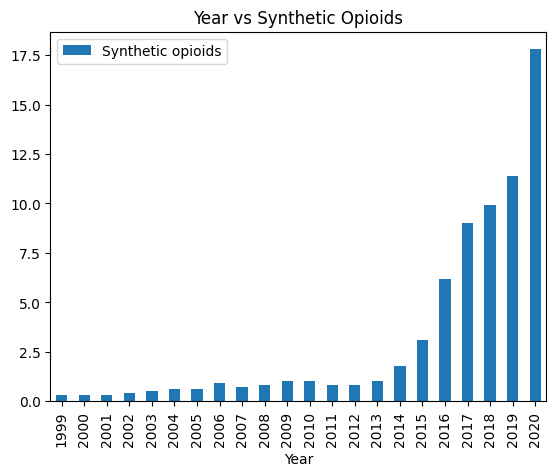

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 5))
df_1.plot(x='Year', y='Synthetic opioids', kind='bar', title='Year vs Synthetic Opioids')

In [23]:
# Assuming 'df' is your DataFrame
max_cocaine_year = df.loc[df_1['Synthetic opioids'].idxmax()]['Year']
print("The year with the highest amount of synthetic opioids recorded:", max_cocaine_year)

The year with the highest amount of synthetic opioids recorded: 2020


# Trend Analysis

<Figure size 1000x500 with 0 Axes>

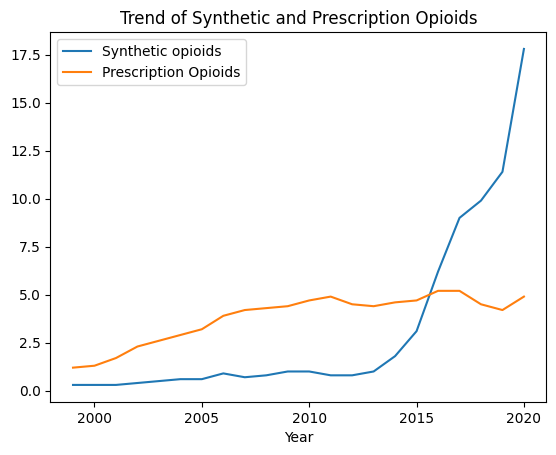

In [24]:
plt.figure(figsize=(10, 5))
df_1.plot(x='Year', y=['Synthetic opioids', 'Prescription Opioids'], kind='line', title='Trend of Synthetic and Prescription Opioids')
plt.show()

<Figure size 1000x500 with 0 Axes>

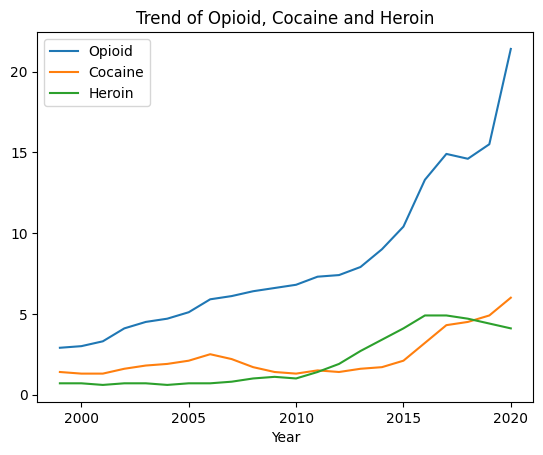

In [25]:
plt.figure(figsize=(10, 5))
df_1.plot(x='Year', y=['Opioid', 'Cocaine', 'Heroin'], kind='line', title='Trend of Opioid, Cocaine and Heroin')
plt.show()

# Credit:

https://www.kaggle.com/code/zeeshanyounas001/drug-overdose-eda